<a href="https://colab.research.google.com/github/Sukrut11/Feature-Engineering-on-Car-Sales-Dataset/blob/main/Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import io
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/archive.zip")
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [ ]:
def analysis(df):
  print("----------------DIMENSIONS-----------------")
  print("Observation:", df.shape[0], "Column:", df.shape[1], "\n")

  print("------------------DTYPES-------------------")
  if len(df.select_dtypes("object").columns) > 0:
    print("Object Variables:", "\n", "Variables:",
          len(df.select_dtypes("object").columns), "\n",
          df.select_dtypes("object").columns.tolist(), "\n")
    
    if len(df.select_dtypes("integer").columns) > 0:
      print("Integer Variables:", "\n", "Variables:",
            len(df.select_dtypes("integer").columns), "\n",
            df.select_dtypes("integer").columns.tolist(), "\n")
    
    if len(df.select_dtypes("float").columns)> 0:
      print("Float Variables:", "\n", "Variables:",
            len(df.select_dtypes("float").columns), "\n",
            df.select_dtypes("float").columns.tolist(), "\n")
      
    if len(df.select_dtypes("bool").columns)> 0:
      print("Bool Variables:", "\n", "Variables:",
            len(df.select_dtypes("bool").columns), "\n",
            df.select_dtypes("bool").columns.tolist(), "\n")
      

    print("----------------MISSING VALUES-----------------")
    print("Any missing values? \n", np.where(df.isnull().values.any() == False,
          "No missing value ❌", "Data includes missing values ✔️"), "\n")
    
    buf = io.StringIO()
    df.info(buf = buf)
    info = buf.getvalue().split("\n")[-2].split(":")[1].strip()
    print("----------------MEMORY USAGE-----------------", info)
    
    return df

In [ ]:
df = analysis(df)
df.head()

----------------DIMENSIONS-----------------
Observation: 157 Column: 16 

------------------DTYPES-------------------
Object Variables: 
 Variables: 4 
 ['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch'] 

Float Variables: 
 Variables: 12 
 ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor'] 

----------------MISSING VALUES-----------------
Any missing values? 
 Data includes missing values ✔️ 

----------------MEMORY USAGE----------------- 19.8+ KB


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


##Missing Values

In [ ]:
features_with_na = [features for features in df.columns if df[features].isnull().sum() > 1]
for feature in features_with_na:
  print(feature, np.round(df[feature].isnull().mean(), 4), "% missing values") 

__year_resale_value 0.2293 % missing values
Price_in_thousands 0.0127 % missing values
Curb_weight 0.0127 % missing values
Fuel_efficiency 0.0191 % missing values
Power_perf_factor 0.0127 % missing values


##Since they are many missing values, we need to find the relationship between missing values and Price in thousands

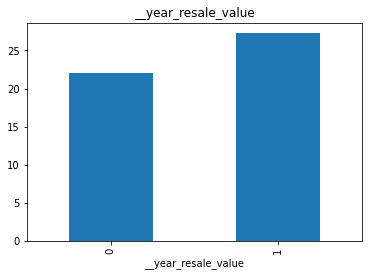

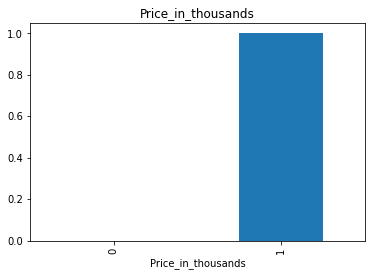

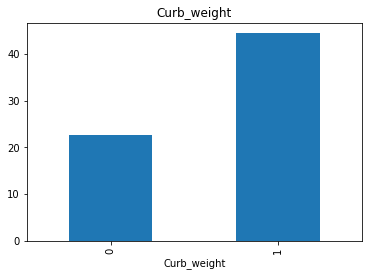

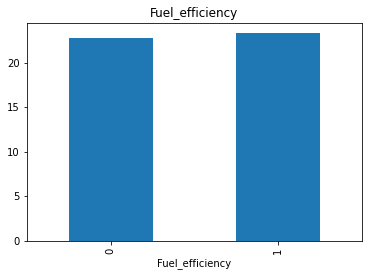

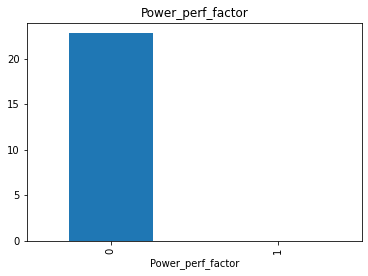

In [ ]:
for feature in features_with_na:
  data = df.copy()
  # let's make a variable that indicates 1 if the observation was missing or zero otherwise
  data[feature] = np.where(data[feature].isnull(), 1, 0)
  # let's calculate the mean Sales where the information is missing or present
  data.groupby(feature)["Price_in_thousands"].median().plot.bar()
  plt.title(feature)
  plt.show()

##Numerical Variable

In [ ]:
numerical_features = [features for features in df.columns if df[features].dtypes != "O"]
print("Number of numerical features: ", len(numerical_features))
df[numerical_features].head()

Number of numerical features:  12


,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [ ]:
year_feature = df["Latest_Launch"]
year_feature

0        2/2/2012
1        6/3/2011
2        1/4/2012
3       3/10/2011
4       10/8/2011
          ...    
152     9/21/2011
153    11/24/2012
154     6/25/2011
155     4/26/2011
156    11/14/2011
Name: Latest_Launch, Length: 157, dtype: object

In [ ]:
print(df.Latest_Launch.unique())

['2/2/2012' '6/3/2011' '1/4/2012' '3/10/2011' '10/8/2011' '8/9/2011'
 '2/27/2012' '6/28/2011' '1/29/2012' '4/4/2011' '11/2/2011' '9/3/2011'
 '3/23/2012' '7/23/2011' '2/23/2012' '4/29/2011' '11/27/2011' '9/28/2011'
 '4/17/2012' '8/17/2011' '3/19/2012' '5/24/2011' '12/22/2011' '10/23/2011'
 '5/12/2012' '9/11/2011' '4/13/2012' '6/18/2011' '1/16/2012' '11/17/2011'
 '6/6/2012' '10/6/2011' '5/8/2012' '7/13/2011' '2/10/2012' '12/12/2011'
 '7/1/2012' '10/31/2011' '6/2/2012' '8/7/2011' '3/6/2012' '1/6/2012'
 '7/26/2012' '11/25/2011' '6/27/2012' '9/1/2011' '3/31/2012' '1/31/2012'
 '8/20/2012' '12/20/2011' '7/22/2012' '9/26/2011' '4/25/2012' '2/25/2012'
 '9/14/2012' '1/14/2012' '8/16/2012' '10/21/2011' '5/20/2012' '3/21/2012'
 '10/9/2012' '2/8/2012' '9/10/2012' '11/15/2011' '6/14/2012' '4/15/2012'
 '11/3/2012' '3/4/2012' '10/5/2012' '12/10/2011' '7/9/2012' '5/10/2012'
 '11/28/2012' '3/29/2012' '10/30/2012' '8/3/2012' '6/4/2012' '12/23/2012'
 '4/23/2012' '11/24/2012' '8/28/2012' '6/29/2012' '1/17/

In [ ]:
df["Latest_Launch"].dtype

dtype('O')

In [ ]:
d_parser = lambda x: pd.datetime.strptime(x, '%m/%d/%Y')
df = pd.read_csv('/content/drive/MyDrive/Datasets/archive.zip', parse_dates=['Latest_Launch'], date_parser=d_parser)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df.loc[df["Latest_Launch"] == '2/2/2012']

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.28015


In [ ]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2012-01-04,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639


In [ ]:
df.loc[0, 'Latest_Launch'].day_name()

'Thursday'

In [ ]:
df['Latest_Launch'].dt.day_name()

0       Thursday
1         Friday
2      Wednesday
3       Thursday
4       Saturday
         ...    
152    Wednesday
153     Saturday
154     Saturday
155      Tuesday
156       Monday
Name: Latest_Launch, Length: 157, dtype: object

In [ ]:
df['Day'] = df['Latest_Launch'].dt.isocalendar().day
df['Week'] = df['Latest_Launch'].dt.isocalendar().week
df['Year'] = df['Latest_Launch'].dt.isocalendar().year

In [ ]:
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Day,Week,Year
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150,4,5,2012
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778,5,22,2011
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2012-01-04,NaN,3,1,2012
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779,4,10,2011
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639,6,40,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,2011-09-21,66.498812,3,38,2011
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,2012-11-24,70.654495,6,47,2012
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,2011-06-25,71.155978,6,25,2011
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,2011-04-26,101.623357,2,17,2011


In [ ]:
date = df[["Day", "Week", "Year"]]

In [ ]:
# let's explore the content of these year variables
for feature in date:
  print(feature, df[feature].unique())

Day <IntegerArray>
[4, 5, 3, 6, 2, 1, 7]
Length: 7, dtype: UInt32
Week <IntegerArray>
[ 5, 22,  1, 10, 40, 32,  9, 26,  4, 14, 44, 35, 12, 29,  8, 17, 47, 39, 16,
 33, 21, 51, 42, 19, 36, 15, 24,  3, 46, 23, 28,  6, 50, 31, 30, 13, 34, 37,
  2, 20, 41, 49, 48, 38,  7, 43, 11, 27, 18, 25, 45, 52]
Length: 52, dtype: UInt32
Year <IntegerArray>
[2012, 2011, 2008, 2009]
Length: 4, dtype: UInt32


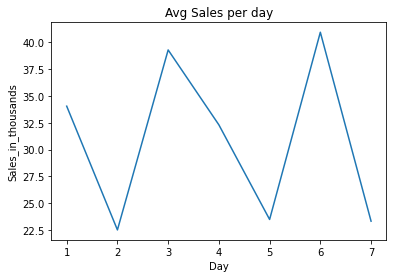

In [ ]:
df.groupby("Day")["Sales_in_thousands"].median().plot()
plt.xlabel("Day")
plt.ylabel("Sales_in_thousands")
plt.title("Avg Sales per day")
plt.show()

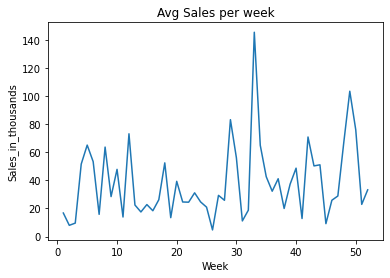

In [ ]:
df.groupby("Week")["Sales_in_thousands"].median().plot()
plt.xlabel("Week")
plt.ylabel("Sales_in_thousands")
plt.title("Avg Sales per week")
plt.show()

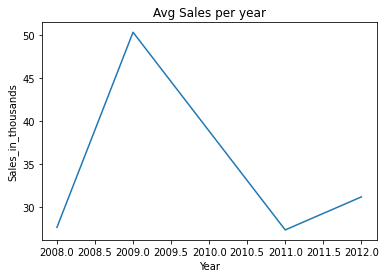

In [ ]:
df.groupby("Year")["Sales_in_thousands"].median().plot()
plt.xlabel("Year")
plt.ylabel("Sales_in_thousands")
plt.title("Avg Sales per year")
plt.show()

In [ ]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

In [ ]:
discrete_features = [feature for feature in df.columns if len(df[feature].unique()) < 40 and feature not in date]
print("Discrete Variabels Count: ",len(discrete_features))

Discrete Variabels Count:  4


In [ ]:
discrete_features

['Manufacturer', 'Vehicle_type', 'Engine_size', 'Fuel_efficiency']

In [ ]:
df[discrete_features]

,Manufacturer,Vehicle_type,Engine_size,Fuel_efficiency
0,Acura,Passenger,1.8,28.0
1,Acura,Passenger,3.2,25.0
2,Acura,Passenger,3.2,26.0
3,Acura,Passenger,3.5,22.0
4,Audi,Passenger,1.8,27.0
...,...,...,...,...
152,Volvo,Passenger,1.9,25.0
153,Volvo,Passenger,2.4,25.0
154,Volvo,Passenger,2.4,25.0
155,Volvo,Passenger,2.3,23.0


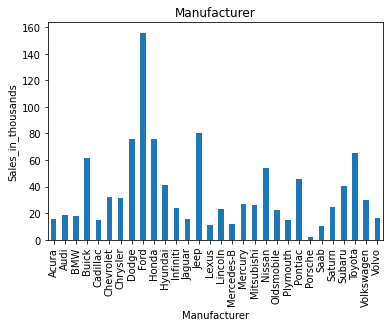

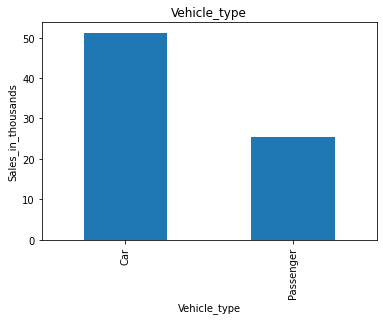

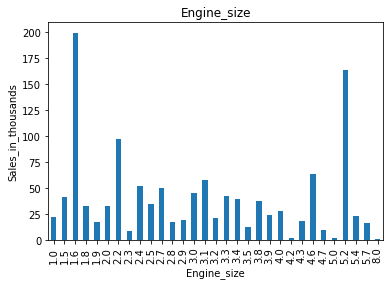

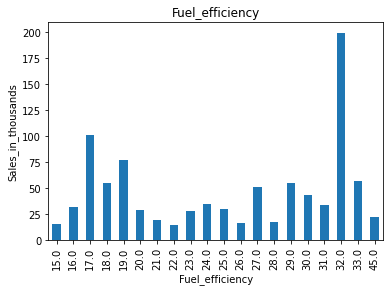

In [ ]:
for feature in discrete_features:
  data = df.copy()
  data.groupby(feature)["Sales_in_thousands"].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel("Sales_in_thousands")
  plt.title(feature)
  plt.show()

##Continuous Variable

In [ ]:
data = df.copy()
data.drop(["Model", "Latest_Launch"], axis = 1, inplace = True)

In [ ]:
continuous_features = [feature for feature in data.columns if feature not in discrete_features and feature not in date]
print("Continuous Feature Count {}".format(len(continuous_features)))

Continuous Feature Count 10


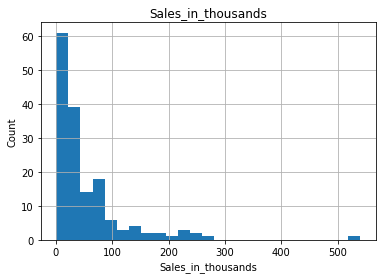

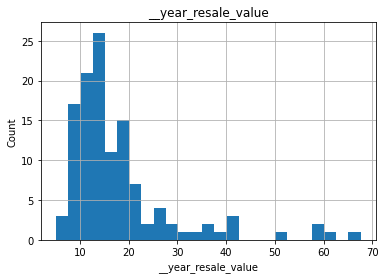

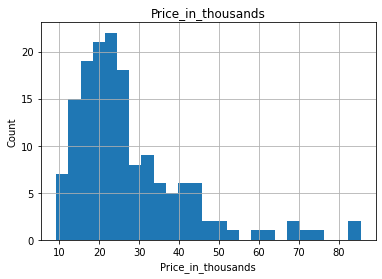

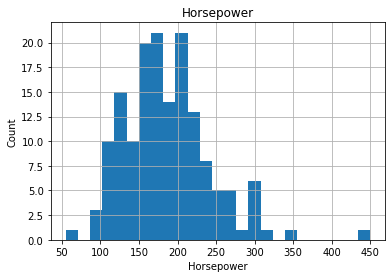

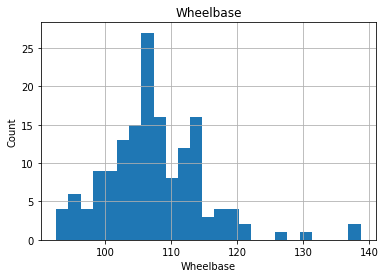

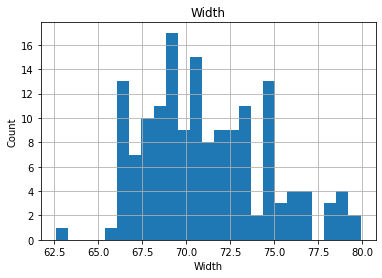

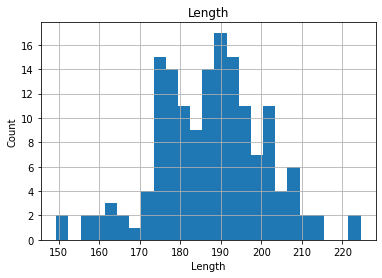

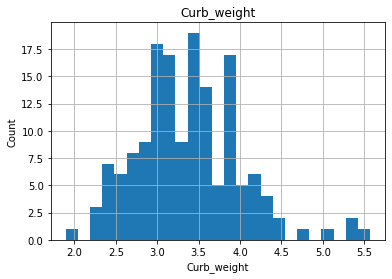

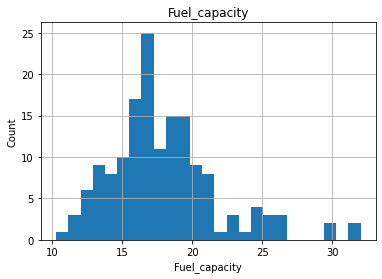

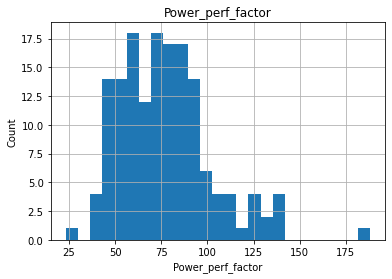

In [ ]:
for feature in continuous_features:
  data = df.copy()
  data[feature].hist(bins = 25)
  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.title(feature)
  plt.show()

##Converting the skewed distributions to guassian distributions


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


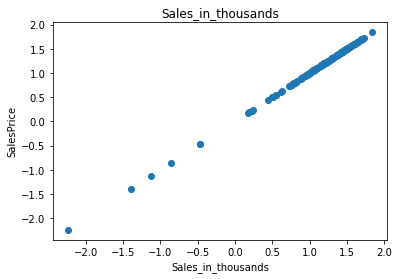

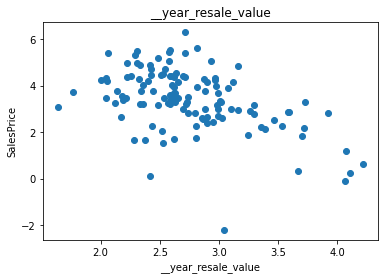

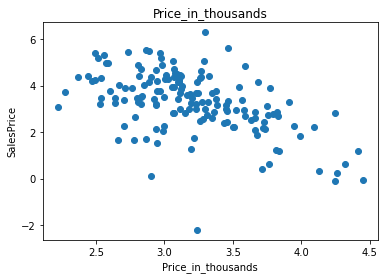

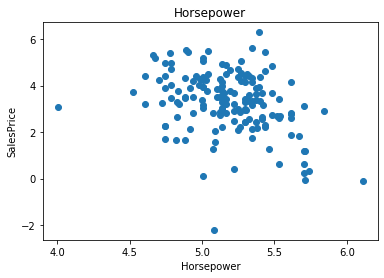

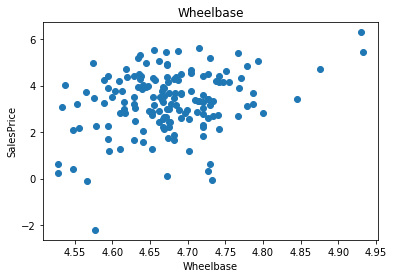

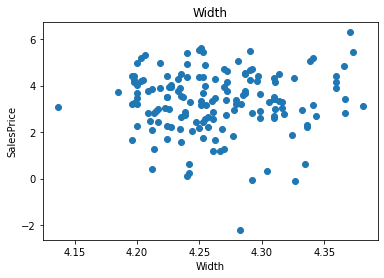

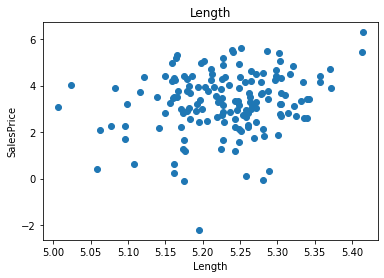

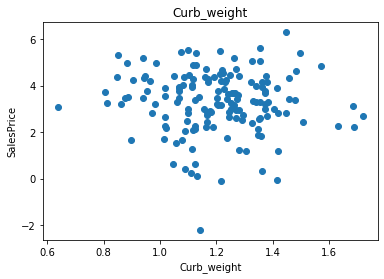

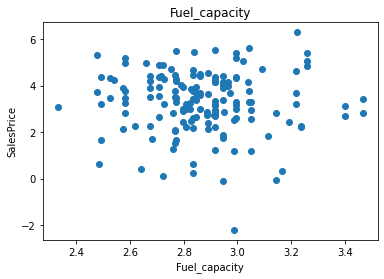

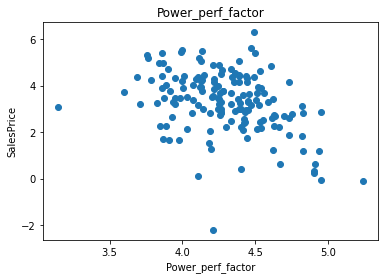

In [ ]:
## We will be using logarithmic transformation
for feature in continuous_features:
  data = df.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature])
    data["Sales_in_thousands"] = np.log(data["Sales_in_thousands"])
    plt.scatter(data[feature], data["Sales_in_thousands"])
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.title(feature)
    plt.show()

##Outliers

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


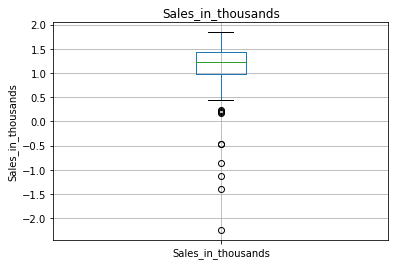

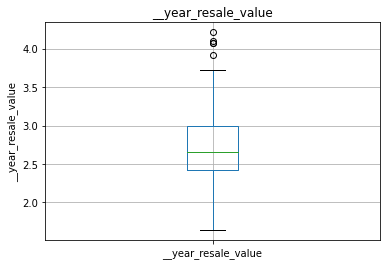

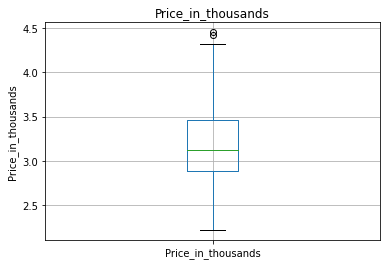

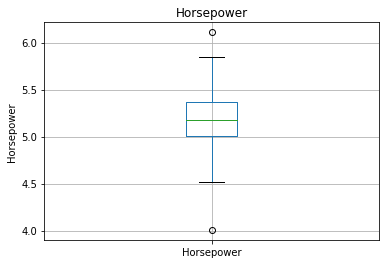

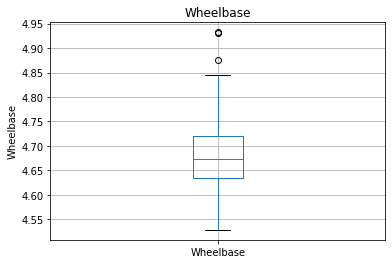

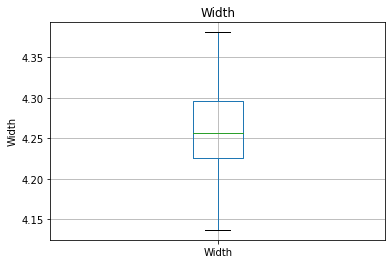

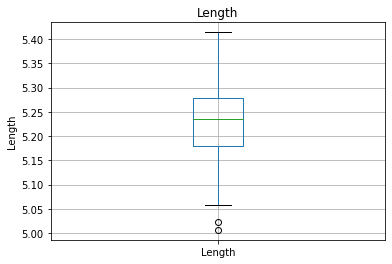

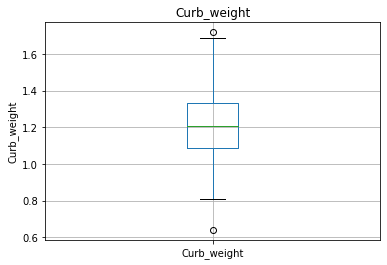

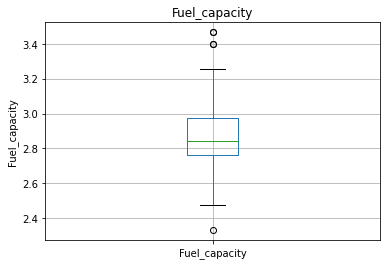

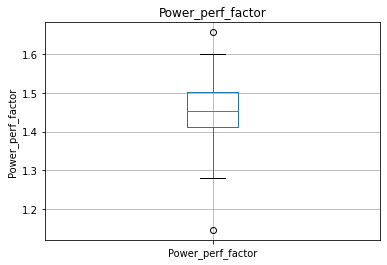

In [ ]:
for feature in continuous_features:
  data = data.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature])
    data.boxplot(column = feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

##Categorical Variables

In [ ]:
categorical_features = [feature for feature in df.columns if data[feature].dtypes == "O"]
categorical_features

['Manufacturer', 'Model', 'Vehicle_type']

In [ ]:
df[categorical_features].head()

,Manufacturer,Model,Vehicle_type
0,Acura,Integra,Passenger
1,Acura,TL,Passenger
2,Acura,CL,Passenger
3,Acura,RL,Passenger
4,Audi,A4,Passenger


In [ ]:
for feature in categorical_features:
  print("The feature is {} and number of categories are {}".format(feature, len(df[feature].unique())))

The feature is Manufacturer and number of categories are 30
The feature is Model and number of categories are 156
The feature is Vehicle_type and number of categories are 2


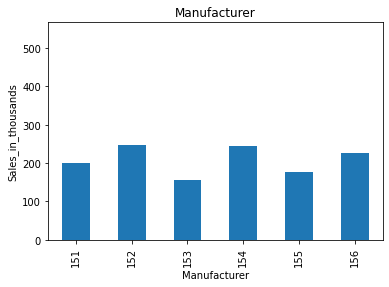

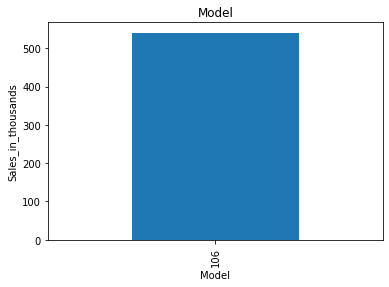

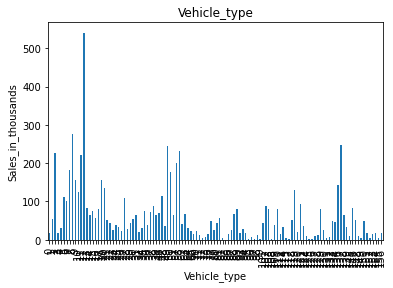

In [ ]:
for feature in categorical_features:
  data = df.copy()
  data.groupby(feature)["Sales_in_thousands"].plot.bar()
  plt.xlabel(feature)
  plt.ylabel("Sales_in_thousands")
  plt.title(feature)
  plt.show()

##Feature Engineering

1. Missing values
2. Temporal variables
3. Categorical variables: remove rare labels
4. Standarise the values of the variables to the same range

In [ ]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes == "O"]
for feature in features_nan:
  print("{}: {}% missing values".format(feature, np.round(df[feature].isnull().mean(),4)))

In [ ]:
## Replace missing value with a new label
def replace_cat_feature(df, features_nan):
  data = df.copy()
  data[features_nan] = data[features_nan].fillna("Missing")
  return data

In [ ]:
df = replace_cat_feature(df, features_nan)
df[features_nan].isnull().sum()

Series([], dtype: float64)

In [ ]:
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Day,Week,Year
0,Acura,Rare_var,2.828437,Rare_var,Passenger,Rare_var,0.587787,4.941642,4.617099,4.209160,5.149817,Rare_var,2.580217,28.0,2012-02-02,Rare_var,4,5,2012
1,Acura,Rare_var,3.673360,Rare_var,Passenger,Rare_var,1.163151,5.416100,4.683057,4.252772,5.262172,Rare_var,2.844909,25.0,2011-06-03,Rare_var,5,22,2011
2,Acura,Rare_var,2.647167,18.225,Passenger,Missing,1.163151,5.416100,4.671894,4.257030,5.257495,Rare_var,2.844909,26.0,2012-01-04,Missing,3,1,2012
3,Acura,Rare_var,2.150366,Rare_var,Passenger,Rare_var,1.252763,5.347108,4.741448,4.268298,5.281171,Rare_var,2.890372,22.0,2011-03-10,Rare_var,4,10,2011
4,Audi,Rare_var,3.015388,Rare_var,Passenger,Rare_var,0.587787,5.010635,4.630838,4.222445,5.181784,2.998,2.797281,27.0,2011-10-08,Rare_var,6,40,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,Rare_var,1.265538,Missing,Passenger,Rare_var,0.641854,5.075174,4.610158,4.213608,5.173887,Rare_var,2.760010,25.0,2011-09-21,Rare_var,3,38,2011
153,Volvo,Rare_var,2.724252,Missing,Passenger,Rare_var,0.875469,5.123964,4.653008,4.238445,5.225209,Rare_var,2.884801,25.0,2012-11-24,Rare_var,6,47,2012
154,Volvo,Rare_var,2.863971,Missing,Passenger,Rare_var,0.875469,5.123964,4.653008,4.238445,5.226821,Rare_var,2.884801,25.0,2011-06-25,Rare_var,6,25,2011
155,Volvo,Rare_var,1.250761,Missing,Passenger,Rare_var,0.832909,5.463832,4.653008,4.269697,5.224132,Rare_var,2.917771,23.0,2011-04-26,Rare_var,2,17,2011


In [ ]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes != "O"]

In [ ]:
for feature in numerical_with_nan:
  print("{} : {}% missing values".format(feature, np.round(df[feature].isnull().mean()), 4))

In [ ]:
for feature in numerical_with_nan:
  ## We will replace by using median since there are outliers
  median_value = df[feature].median()

  ## create a new feature to capture nan values
  df[feature + "nan"] = np.where(df[feature].isnull(),1,0)
  df[feature].fillna(median_value, inplace = True)

In [ ]:
df[numerical_with_nan].isnull().sum()

Series([], dtype: float64)

##Numerical Variables

In [ ]:
num = [feature for feature in df.columns if df[feature].dtype != "O" and feature not in ["Day", "Week", "Year", "Latest_Launch"]]

In [ ]:
df[num].keys()

Index(['Sales_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Fuel_capacity'],
      dtype='object')

In [ ]:
for feature in num:
  df[feature] = np.log(df[feature])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


##Handling Rare Categorical Feature

In [ ]:
categorical_feature = [feature for feature in df.columns if df[feature].dtype == "O"]
categorical_feature

['Manufacturer',
 'Model',
 '__year_resale_value',
 'Vehicle_type',
 'Price_in_thousands',
 'Curb_weight',
 'Fuel_efficiency',
 'Power_perf_factor']

In [ ]:
for feature in categorical_feature:
  temp = df.groupby(feature)["Sales_in_thousands"].count() / len(df)
  temp_df = temp[temp>0.01].index
  df[feature] = np.where(df[feature].isin(temp_df), df[feature], "Rare_var")

In [ ]:
df.head(100)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Day,Week,Year
0,10,0,1.039724,Rare_var,0,Rare_var,-0.531391,1.597698,1.529767,1.437263,1.638961,Rare_var,0.947873,28.0,2012-02-02,Rare_var,4,5,2012
1,10,0,1.301107,Rare_var,0,Rare_var,0.151133,1.689376,1.543951,1.447571,1.660544,Rare_var,1.045531,25.0,2011-06-03,Rare_var,5,22,2011
2,10,0,0.973490,18.225,0,Missing,0.151133,1.689376,1.541565,1.448572,1.659655,Rare_var,1.045531,26.0,2012-01-04,Missing,3,1,2012
3,10,0,0.765638,Rare_var,0,Rare_var,0.225351,1.676556,1.556343,1.451215,1.664148,Rare_var,1.061385,22.0,2011-03-10,Rare_var,4,10,2011
4,1,0,1.103728,Rare_var,0,Rare_var,-0.531391,1.611563,1.532738,1.440414,1.645149,2.998,1.028648,27.0,2011-10-08,Rare_var,6,40,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4,0,0.180027,Rare_var,0,Rare_var,0.475885,1.742294,1.524995,1.450887,1.644171,Rare_var,1.114903,20.0,2011-03-17,Rare_var,4,11,2011
96,4,0,0.731979,Missing,0,38.9,-0.182831,1.657661,1.514819,1.437968,1.621754,Rare_var,1.017518,26.0,2011-01-16,Rare_var,7,2,2011
97,4,0,-0.861211,Missing,0,Rare_var,-0.182831,1.652566,1.514819,1.437968,1.621002,Rare_var,0.970422,27.0,2011-08-06,Rare_var,6,31,2011
98,4,0,0.896217,Missing,0,Rare_var,0.151133,1.680947,1.539551,1.439020,1.647624,Rare_var,1.028648,26.0,2011-07-08,Rare_var,5,27,2011


In [ ]:
for feature in categorical_features:
  labels_ordered = df.groupby([feature])["Sales_in_thousands"].mean().sort_values().index
  labels_ordered = {k:i for i, k in enumerate(labels_ordered, 0)}
  df[feature] = df[feature].map(labels_ordered)

In [ ]:
scaling_feature = [feature for feature in df.columns if feature not in  ["Sales_in_thousands" , "Day", "Week", "Year"]]
len(scaling_feature)

15

In [ ]:
scaling_feature

['Manufacturer',
 'Model',
 '__year_resale_value',
 'Vehicle_type',
 'Price_in_thousands',
 'Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Latest_Launch',
 'Power_perf_factor']

In [ ]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Day,Week,Year
0,9,0,45.0,3,0,2,17.0,33.0,15.0,39.0,33.0,3,36.0,3,36,1,5,36,2
1,9,0,90.0,3,0,2,10.0,17.0,46.0,44.0,74.0,3,29.0,8,79,1,1,17,1
2,9,0,36.0,1,0,1,10.0,17.0,51.0,12.0,19.0,3,29.0,2,60,0,4,16,2
3,9,0,20.0,3,0,2,6.0,31.0,4.0,7.0,12.0,3,26.0,1,15,1,5,34,1
4,3,0,57.0,3,0,2,17.0,44.0,13.0,22.0,63.0,4,20.0,10,45,1,6,38,1


In [ ]:
feature_scale = [feature for feature in df.columns if feature not in ["Sales_in_thousands"]]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[feature_scale].apply(pd.to_numeric))

MinMaxScaler()

In [ ]:
scaler.transform(df[feature_scale])

array([[0.35714286, 0.        , 0.6       , ..., 0.83333333, 0.70588235,
        0.66666667],
       [0.35714286, 0.        , 0.6       , ..., 0.16666667, 0.33333333,
        0.33333333],
       [0.35714286, 0.        , 0.2       , ..., 0.66666667, 0.31372549,
        0.66666667],
       ...,
       [0.17857143, 0.        , 0.4       , ..., 1.        , 0.21568627,
        0.33333333],
       [0.17857143, 0.        , 0.4       , ..., 0.33333333, 0.49019608,
        0.33333333],
       [0.17857143, 0.        , 0.4       , ..., 0.5       , 0.39215686,
        0.33333333]])